# Twitter分析

つぶやきを集計して簡単にビジュアライズします。    
各スクリプトはMongoDBに接続可能な状態で実行してください。   

## 時系列分析
過去7日間における時間帯ごとのつぶやき数を集計し、プロットします。  
集計単位は下記のとおりです。  
- 1時間ごと
- 日ごと
- 時間帯別

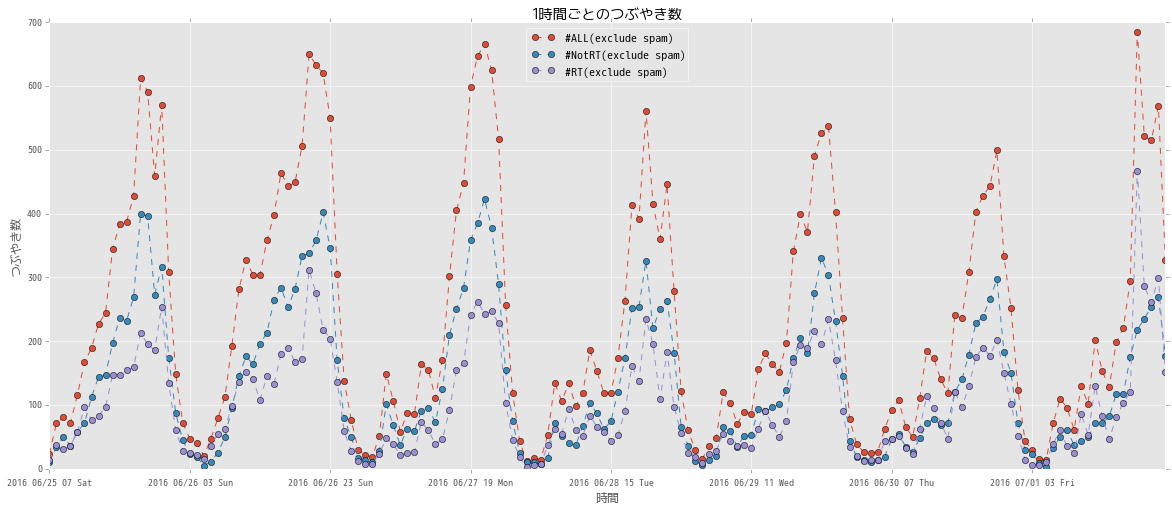

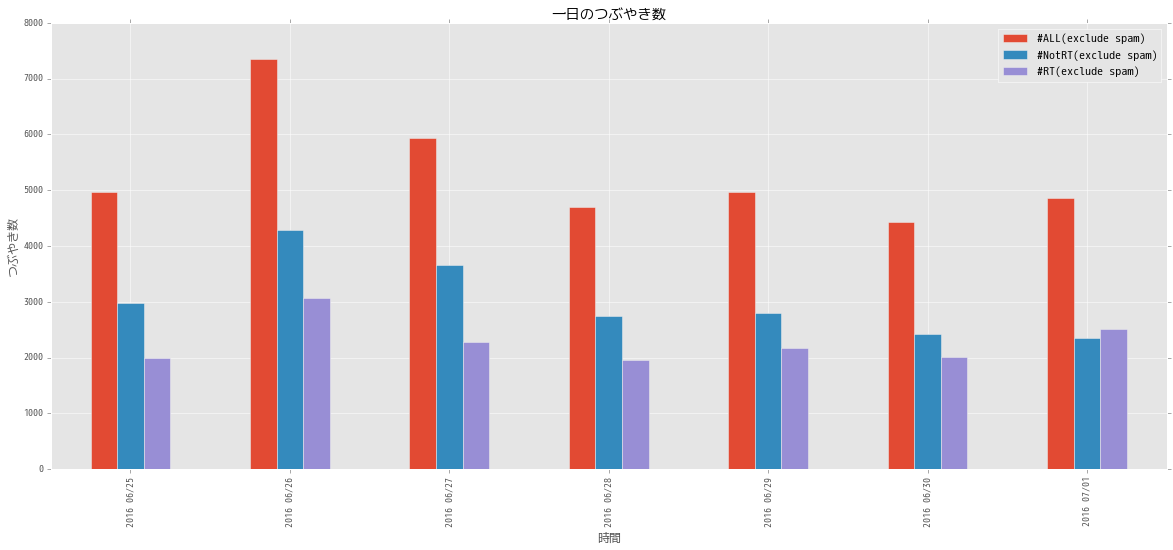

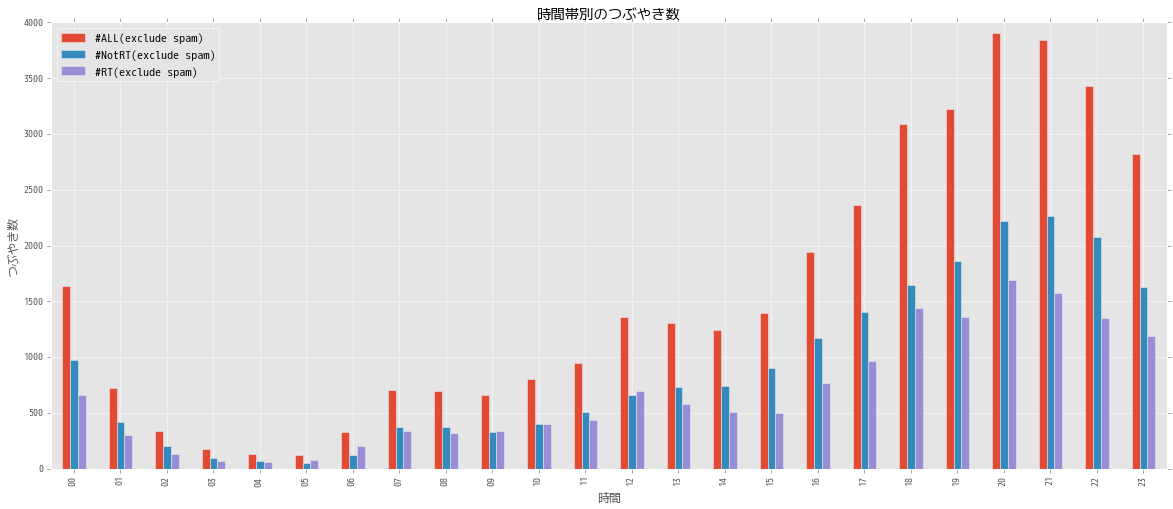

In [3]:
%matplotlib inline
from _datetime import *
import time_series
import matplotlib.pyplot as plt

plt.style.use('ggplot')# ちょっとおしゃれにする。
plt.rcParams['font.family'] = 'Migu 1M'# 日本語フォントの設定

# ここの部分のコメントアウトを外して実行すると、使用可能な（インストールされている）フォントが表示されます。
# 必要に応じて、適当な日本語フォントに設定し直してださい。
"""
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)
"""

today = datetime.today()
condition = {'created_datetime': {'$gte': today - timedelta(days=7), '$lte': today}}# 過去一週間以内の全ツィートを検索対象とする。

# 1時間ごとのつぶやき数
df = time_series.get_time_series_data(condition, '%Y %m/%d %H %a')
df.plot(y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], linestyle='dashed', marker='o', figsize=(20, 8))
plt.title('1時間ごとのつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

# 日ごとのつぶやき数
df = time_series.get_time_series_data(condition, '%Y %m/%d')
df.plot(kind='bar', y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], figsize=(20, 8))
plt.title('一日のつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

# 時間帯別のつぶやき数
df = time_series.get_time_series_data(condition, '%H')
df.plot(kind='bar', y=['#ALL(exclude spam)', '#NotRT(exclude spam)', '#RT(exclude spam)'], figsize=(20, 8))
plt.title('時間帯別のつぶやき数')
plt.xlabel('時間')
plt.ylabel('つぶやき数')
plt.show()

## 本日のツィート
今日のつぶやき（素データ）を最大1000件表示します。 

In [1]:
import db, date_ext
from _datetime import *
import pandas as pd
from pandas import DataFrame

# 最大1000ツィートまで表示するように設定。
pd.options.display.max_rows = 1000 

tweet_collection = db.connect_tweet_collection()
date_format = '%Y/%m/%d %a %H:%M:%S'
today = datetime.today()
condition = {'retweeted_status': {'$eq': None},
             'created_datetime': {'$gte': today - timedelta(days=1), '$lte': today}}# 今日のツィートを検索対象とする。

results = [
    {'日付': date_ext.date_to_japan_time(tweet['created_datetime']).strftime(date_format),
     'リツィート回数': tweet['retweet_count'],
     'ユーザー名': tweet['user']['screen_name'], 
     'つぶやき': tweet['text']}
    for tweet in tweet_collection.find(condition, {'created_datetime': 1, 'retweet_count': 1, 'id': 1, 'user': 1, 'text': 1})]

DataFrame(results, columns=['日付', 'リツィート回数', 'ユーザー名', 'つぶやき']).sort_values(by='日付', ascending=False).reset_index(drop=True)

,日付,リツィート数,ユーザー名,つぶやき
0,2016/07/01 Fri 22:38:10,0,hisamematu246,@p_m_0403 \nえへへ♪( ´▽｀)\nほどほどにしとくよ金欠だし…\n絵師さんのネ...
1,2016/07/01 Fri 22:38:03,0,M_okmathu,ネットプリントのちょっとネタバレ( ˇωˇ ) https://t.co/jEWRyvwcW7
2,2016/07/01 Fri 22:38:02,0,TaMa03v29,@TaMa03v29 \nこちらは5日まで\n30円です\nセブン以外のコンビニで印刷可能です
3,2016/07/01 Fri 22:37:36,0,Macaroon34jcb9,ネットプリントやろっかな…。\n1つ前のやつはTwitterで、買うって言ってくれた人12人...
4,2016/07/01 Fri 22:37:35,0,RNXA3,@tacumi__ 初めまして！こちらこそセブンネットプリントしていただいてありがとうござい...
5,2016/07/01 Fri 22:37:22,0,2020matsu,ネットプリントはなぜこんなに時間がかかるのか(打つの遅い)
6,2016/07/01 Fri 22:37:15,0,hoshikuzuichiko,今宵も滅茶苦茶ネットプリントした。
7,2016/07/01 Fri 22:37:06,0,pacacara_rishe,ゆきねさんのネットプリント綺麗すぎる禿げた
8,2016/07/01 Fri 22:37:04,0,RiSM02682,ネットプリントどのくらいの比率にすれば端切れなくなりますかね……
9,2016/07/01 Fri 22:37:04,0,mtnrryk08,わいもネットプリントさせて頂き申した！！！\n家宝にすっぺ〜〜〜〜〜😋🎌✨✨ https:/...
